# Statistiscal Analysis

Chi-square Tests

In [1]:
# import necessary libraries 
import pandas as pd
import numpy as np 
import seaborn as sb 
from scipy import stats

In [3]:
# load the dataset 
df = sb.load_dataset("titanic") 
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Null Hypothesis : There is no significant association between gender ('Sex') and survival('Survived') on the Titanic. This means any observed difference in survival rates between genders in the dataset are due to chance and not any kind of underlying relationship.

Alternate Hypothesis : There is a significant association between gender ('Sex') and survival('Survived') on the Titanic. This implies that the difference in survival rates are not just due to chance but are influenced by the passengers' gender.

In [5]:
# Contingency table for 'sex' and 'survived'
contigency_table = pd.crosstab(df['survived'], df['sex'])
contigency_table

sex,female,male
survived,,
0,81,468
1,233,109


In [ ]:
# Perform Chi-Sqaured test 
chi2,p,dof,exp=stats.chi2_contingency(contigency_table)
# Print the results
print("Chi-Squared Test Results:") 
print("Chi2: ",chi2) 
print("p-value: ",p) 
print("Degree of Freedom ",dof) 
print("Expected Frequencies: \n", exp) 

Chi-Squared Test Results:
Chi2:  260.71702016732104
p-value:  1.1973570627755645e-58
Degree of Freedom  1
Expected Frequencies: 
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


The above chi-sqaured test gave a p-value of 1.1973570627755645e-58(1.1973570627755645 * 10^-58) which is far less than 0.05 confidence interval. So we reject Null hypothes and accept alternate hypothesis meaning there is significant difference between the gender and survived column.

# Normality Test / Normal(Gaussian) Distribution test

<Axes: xlabel='age', ylabel='Count'>

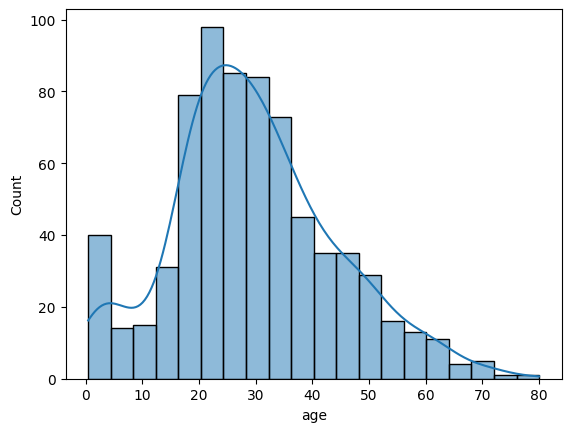

In [5]:
# graphical method
sb.histplot(df,x='age',kde=True)

The data is close to normal but not completely normal because we can see a little uneven surface on the right of the curve so we need to visualize the data more deeply

<Axes: xlabel='age', ylabel='Count'>

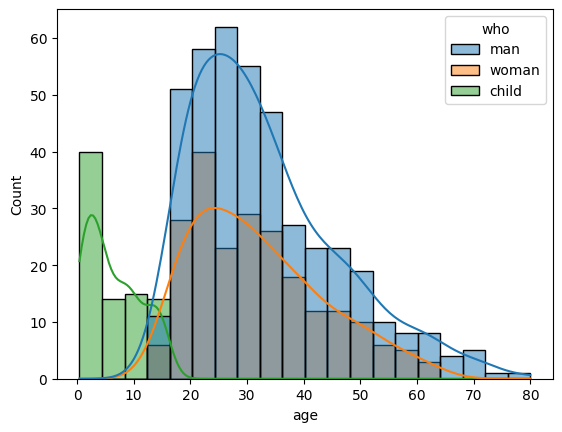

In [6]:
# For more indepth visualization
sb.histplot(df,x='age',kde=True,hue='who')

We are still not able to analyze the normality of the distribution so we will move onto shapiro wilk Test<br>
Null hypotheses : The data is normally distributed.<br>
Alternative Hypothesis: The data is not normally distributed.

In [7]:
# shapiro wilk test for normality
st,p=stats.shapiro(df['age'])
if p < 0.05:
    print("The age distribution is not normal (p < 0.05) null hypothesis rejected.") 
else:
    print("The age distribution is normal (p >= 0.05) null hypothesis accepted.") 

The age distribution is normal (p >= 0.05) null hypothesis accepted.


Kolmogorov-Smirnov Test(less reliable than shapiro wilk test for normality check)<br>
Null hypotheses : The data is normally distributed.<br>
Alternative Hypothesis: The data is not normally distributed.

In [8]:
from scipy.stats import kstest
# Kolmogorov-Smirnov test for normality
st,p = kstest(df['age'],'norm') 
if p < 0.05:
    print("The age distribution is not normal (p < 0.05) null hypothesis rejected.")
else:
    print("The age distribution is normal (p >= 0.05) null hypothesis accepted.")

The age distribution is normal (p >= 0.05) null hypothesis accepted.


# t-test (Applied when sample size is less than 30)

One-sample t-test : Compares sample mean of one feature with the population mean(assumed in this case)

In [1]:
from scipy import stats
# sample data 
x = [1,2,3,4,5,6,7,8,9,10] 
# assume known population mean 
mu = 5 
# perform one-sample t-test 
st,p = stats.ttest_1samp(x,mu) 
#print the results 
if p < 0.05:
    print(f"p-value: {p} The sample mean is significantly different from the population mean (p < 0.05) null hypothesis rejected.")
else:
    print(f"p-value: {p} The sample mean is not significantly different from the population mean (p >= 0.05) null hypothesis accepted.")

p-value: 0.614117254808394 The sample mean is not significantly different from the population mean (p >= 0.05) null hypothesis accepted.


Two-sample t-test : Compares one sample mean with another sample mean trying to point out the similarity or difference between two features of the dataset.

In [13]:
# sample data
x = [1,2,3,4,5,6,7,8,9,10] 
y = [2.1,3,5,6.7,7.8,8.9,9.1,10.2,11.3,12.4] 
# perform two-sample t-test 
st,p = stats.ttest_ind(x,y)
#print the results
if p < 0.05:
    print(f"p-value: {p} The two sample means are significantly different (p < 0.05) null hypothesis rejected.")
else:
    print(f"p-value: {p} The two sample means are not significantly different (p >= 0.05) null hypothesis accepted.")

p-value: 0.1551262259583198 The two sample means are not significantly different (p >= 0.05) null hypothesis accepted.


Paired t-test : Compares the same sample twice recorded in different time frames

In [15]:
# sample data 
x = [1,2,3,4,5,6,7,8,9,10]
y = [2.1,3,5,6.7,7.8,8.9,9.1,10.2,11.3,12.4] 
# perform paired t-test 
st,p = stats.ttest_rel(x,y) # if want to check using variance then use stats.ttest_ind(x,y, equal_var=False)
#print the results 
if p < 0.05:
    print(f"p-value: {p} The two paired samples are significantly different (p < 0.05) null hypothesis rejected.")
else:
    print(f"p-value: {p} The two paired samples are not significantly different (p >= 0.05) null hypothesis accepted.")

p-value: 2.519695604342732e-06 The two paired samples are significantly different (p < 0.05) null hypothesis rejected.


# ANOVA : ANALYSIS OF VARIANCE

1. One way Anova

In [ ]:
# Sample data for one-way ANOVA : height of 10 people in three different groups
group1 = [4.3,5.2,6.3,5.7,5.9,6.2,5.6,4.1,4.9,5.5] 
group2 = [4.1,5,6,5.6,5.8,6.1,5.5,4,4.8,5.4]
group3 = [4.9,5.8,6.9,6.3,6.5,6.8,6.2,4.7,5.5,6.1]
# perform one-way ANOVA 
f,p = stats.f_oneway(group1, group2, group3)
# print the results 
if p < 0.05:
    print(f"p-value: {p} At least one of the sample means is significantly different (p < 0.05) null hypothesis rejected.")
else:
    print(f"p-value: {p} All sample means are not significantly different (p >= 0.05) null hypothesis accepted.")

p-value: 0.0795168012694981 All sample means are not significantly different (p >= 0.05) null hypothesis accepted.


In [23]:
# One way ANOVA using statsmodels 
# import necessary libraries 
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import pandas as pd

In [6]:
# Create a DataFrame with the sample data 
data = {
    'fertilizer': ['A']*5 + ['B']*5 + ['C']*5,
    'growth': [20, 21, 19, 22, 20,   # Fertilizer A
               23, 25, 24, 22, 26,   # Fertilizer B
               18, 17, 19, 16, 18]   # Fertilizer C
}
df = pd.DataFrame(data)
df.head()

,fertilizer,growth
0,A,20
1,A,21
2,A,19
3,A,22
4,A,20


In [13]:
# Fit the model 
model = ols('growth ~ fertilizer', data=df).fit()  

In [14]:
# Perform ANOVA and print the summary table 
anova_table = sm.stats.anova_lm(model, typ=2) 
anova_table

,sum_sq,df,F,PR(>F)
fertilizer,102.933333,2.0,30.27451,0.00002
Residual,20.400000,12.0,NaN,NaN


In [15]:
# End result 
if anova_table['PR(>F)'].iloc[0] < 0.05:
    print(f"p-value: {anova_table['PR(>F)'].iloc[0]} At least one of the sample means is significantly different (p < 0.05) null hypothesis rejected.")
else:
    print(f"p-value: {anova_table['PR(>F)'].iloc[0]} All sample means are not significantly different (p >= 0.05) null hypothesis accepted.")

p-value: 2.0478502169551086e-05 At least one of the sample means is significantly different (p < 0.05) null hypothesis rejected.


2. Two-way ANOVA

In [8]:
data = {
    'fertilizer': ['A']*9 + ['B']*9 + ['C']*9,
    'water': (['Low']*3 + ['Medium']*3 + ['High']*3)*3,
    'growth': [
        18, 19, 20, 21, 22, 21, 23, 24, 22,   # Fertilizer A: Low/Medium/High
        21, 22, 23, 24, 25, 24, 26, 27, 25,   # Fertilizer B: Low/Medium/High
        16, 17, 18, 18, 19, 18, 20, 21, 19    # Fertilizer C: Low/Medium/High
    ]
}
df = pd.DataFrame(data) 
df.head()

,fertilizer,water,growth
0,A,Low,18
1,A,Low,19
2,A,Low,20
3,A,Medium,21
4,A,Medium,22


In [15]:
# Fit the model 
model = ols('growth ~ C(water) * C(fertilizer)',data=df).fit()

In [12]:
# Perform ANOVA and print the summary table 
anova_table = sm.stats.anova_lm(model, typ=2) 
anova_table

,sum_sq,df,F,PR(>F)
C(water),60.666667,2.0,39.000000,2.864253e-07
C(fertilizer),144.666667,2.0,93.000000,3.241761e-10
C(water):C(fertilizer),1.333333,4.0,0.428571,7.861024e-01
Residual,14.000000,18.0,NaN,NaN


In [13]:
# End result 
if anova_table['PR(>F)'].iloc[2] < 0.05:
    print(f"p-value: {anova_table['PR(>F)'].iloc[2]} At least one of the sample means is significantly different (p < 0.05) null hypothesis rejected.")
else:
    print(f"p-value: {anova_table['PR(>F)'].iloc[2]} All sample means are not significantly different (p >= 0.05) null hypothesis accepted.")

p-value: 0.7861024487886747 All sample means are not significantly different (p >= 0.05) null hypothesis accepted.


3. Three-way ANOVA

In [ ]:
import itertools
fertilizer_levels = ['A', 'B', 'C']
water_levels = ['Low', 'Medium', 'High']
sunlight_levels = ['Low', 'Medium', 'High']

combinations = list(itertools.product(fertilizer_levels, water_levels, sunlight_levels))

growth_values = [
    18, 19, 20, 21, 22, 21, 23, 24, 22,   # Fertilizer A
    21, 22, 23, 24, 25, 24, 26, 27, 25,   # Fertilizer B
    16, 17, 18, 18, 19, 18, 20, 21, 19    # Fertilizer C
] * 3  

data = {
    'fertilizer': [c[0] for c in combinations] * 3,  
    'water': [c[1] for c in combinations] * 3,
    'sunlight': [c[2] for c in combinations] * 3,
    'growth': growth_values[:len(combinations) * 3]
}
df_anova = pd.DataFrame(data)

# Convert to categorical
df_anova['fertilizer'] = df_anova['fertilizer'].astype('category')
df_anova['water'] = df_anova['water'].astype('category')
df_anova['sunlight'] = df_anova['sunlight'].astype('category')


In [44]:
# Fit the model
model = ols('growth ~ C(water) * C(fertilizer) * C(sunlight)', data=df_anova).fit()

In [45]:
# Perform ANOVA and print the summary table 
anova_table = sm.stats.anova_lm(model, typ=2) 
anova_table

,sum_sq,df,F,PR(>F)
C(water),1.820000e+02,2.0,1.889021e+28,0.000000
C(fertilizer),4.340000e+02,2.0,4.504588e+28,0.000000
C(sunlight),1.400000e+01,2.0,1.453093e+27,0.000000
C(water):C(fertilizer),4.000000e+00,4.0,2.075847e+26,0.000000
C(water):C(sunlight),2.800000e+01,4.0,1.453093e+27,0.000000
C(fertilizer):C(sunlight),1.846710e-27,4.0,9.583720e-02,0.983368
C(water):C(fertilizer):C(sunlight),8.066867e-28,8.0,2.093198e-02,0.999998
Residual,2.601348e-25,54.0,NaN,NaN


In [46]:
# End result 
if anova_table['PR(>F)'].iloc[-2] < 0.05:
    print(f"p-value: {anova_table['PR(>F)'].iloc[-2]} At least one of the sample means is significantly different (p < 0.05) null hypothesis rejected.")
else:
    print(f"p-value: {anova_table['PR(>F)'].iloc[-2]} All sample means are not significantly different (p >= 0.05) null hypothesis accepted.")

p-value: 0.9999976527860471 All sample means are not significantly different (p >= 0.05) null hypothesis accepted.
